## 1.3 Overdetermined problems

Suppose we have $M$ observations $\mathbf{y}$ (with noise $\mathbf{n}$) of $N$ physical variables $\mathbf{x}$. An **overdetermined problem** is a problem for which there are more observational constraints than there are unknowns, i.e. $M > N$.

This system is described by the linear equation

$\mathbf{y} = \mathbf{E} \mathbf{x} + \mathbf{n}$

where

$\mathbf{y} = [y_{1}\; y_{2}\; ...\;y_{M}]^{\top} =
\begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots \\
  y_{M} \\
\end{pmatrix}$,

$\mathbf{n} = [n_{1}\; n_{2}\; ...\;n_{M}]^{\top} =
\begin{pmatrix}
  n_{1} \\
  n_{2} \\
  \vdots \\
  n_{M} \\
\end{pmatrix}$, and

$\mathbf{x} = [x_{1}\; x_{2}\; ...\;x_{N}]^{\top} =
\begin{pmatrix}
  x_{1} \\
  x_{2} \\
  \vdots \\
  x_{N} \\
\end{pmatrix}$,


##### Example: Linear regression in a hypothetical perfectly-determined system ($M=N$)
Suppose the temperature $T$ of a system is thought to be a linear function of time $t$:

$T = c_{0} + c_{1} t$

Suppose we have perfect temperature measurements at two times: $T_{1}(t_{1})$ and $T_{2}(t_{2})$. We want to determine the unknown constants $t_{0}$ and $t_{1}$.

This linear system, which we rewrite in the form $\mathbf{y} = \mathbf{E} \mathbf{x}$, is:

$
\begin{pmatrix}
  T_{1} \\
  T_{2}
\end{pmatrix} =
\begin{pmatrix}
1& t_{1}\\
1& t_{2}
\end{pmatrix} \begin{pmatrix}
c_{0}\\
c_{1}
\end{pmatrix}
$,

where we identify $\mathbf{y} \equiv \mathbf{T}$ as our observations, $\mathbf{E} \equiv \begin{pmatrix}
1& t_{1}\\
1& t_{2}
\end{pmatrix}$ as our observational matrix, and $\mathbf{x} \equiv \mathbf{c}$ are the physical constants we aim to estimate.

Assuming $\mathbf{E}$ is invertible, the system admits an exact solution $\mathbf{c} = \mathbf{E}^{-1} \mathbf{T}$. This is a sufficiently simple example that we can invert the observational matrix by hand to verify the solution produces by our linear solver software of choice:

$\mathbf{E}^{-1} = 
\dfrac{1}{t_{2} - t_{1}}
\begin{pmatrix}
t_{2}& -t_{1}\\
-1& 1
\end{pmatrix}
$
and thus

$\mathbf{c} = \dfrac{1}{t_{2}-t_{1}}
\begin{pmatrix}
t_{2}T_{1} - t_{1}T_{2}\\
T_{2} - T_{1}
\end{pmatrix} = \begin{pmatrix}
\dfrac{t_{2}T_{1} - t_{1}T_{2}}{t_{2}-t_{1}} &
\dfrac{T_{2} - T_{1}}{t_{2} - t_{1}}
\end{pmatrix}^{\top}
$

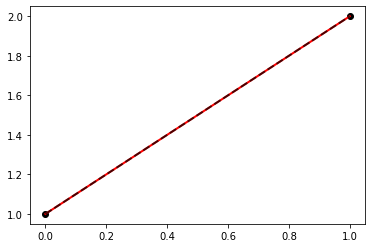

In [1]:
import numpy as np

# Example
tobs = np.array([0., 1.])
Tobs = np.array([1., 2.])

# Solvers
## By-hand
c = np.array([(tobs[1]*Tobs[0]-tobs[0]*Tobs[1])/(tobs[1]-tobs[0]), (Tobs[1]-Tobs[0])/(tobs[1]-tobs[0])])

## Using scipy
from scipy import linalg
E = np.array([[1., tobs[0]], [1., tobs[1]]])
Einv = linalg.inv(E)
c_scipy = np.matmul(Einv, Tobs)

# Ouput grid
t = np.arange(0., 1.1, 0.1)
y_scipy = c_scipy[0]+c_scipy[1]*t
y = c[0]+c[1]*t

import matplotlib.pyplot as plt
plt.plot(tobs, Tobs, "ko")
plt.plot(t, y, "r-", lw=2)
plt.plot(t, y_scipy, "k--", alpha=0.7, lw=2)

### 1.3.3 The least-squares cost function

We seek to minimize a *weighted least-squares cost function*,
\begin{equation}
J = \mathbf{n}^{\top} \mathbf{W}^{-1} \mathbf{n},
\end{equation}
which comes as "close as possible" to solving $\mathbf{E} \mathbf{x} = \mathbf{y}$, where $\mathbf{W}$ is a weighting matrix.

**Note:** the $l_{2}$ or "2-norm" of a vector is a standard measure of its length:
\begin{equation}
\Vert\mathbf{n}\Vert_{2} = \left( \mathbf{n}^{\top} \mathbf{n} \right)^{1/2}
\end{equation}
Linear transformations of the coordinate system can be incorporated into this definition to yield a more general norm
\begin{equation}
\Vert\mathbf{n}\Vert_{2} = \left( \mathbf{n}^{\top} \mathbf{W} \mathbf{n} \right)^{1/2}.
\end{equation}
We recognize the weighted least-squares cost function as the squared weighted 2-norm of the noise vector $J \equiv \Vert \mathbf{n} \Vert_{2}^{2}$. 

The solution is simplest if $\mathbf{W}$ is a diagonal matrix, which admits an inverse
\begin{equation}
W^{-1} = \begin{pmatrix}
1/\alpha_{1} & & &\\
& 1/\alpha_{2} & &\\
& & ... &\\
& & & 1/\alpha_{M}
\end{pmatrix}^{-1} =
\begin{pmatrix}
\alpha_{1} & & &\\
& \alpha_{2} & &\\
& & ... &\\
& & & \alpha_{M}
\end{pmatrix}
\end{equation}

In the limit of no weighting, or $\mathbf{W} \equiv I_{M}$, then the cost-function defaults to the *ordinary least-squares cost function* $J_{\text{OLS}} = \mathbf{n}^{\top}\mathbf{n}$.

The cost function describes the degree of error in the model; a useful metric is the *root mean squared error* $\sqrt{J/M}$.

### 1.3.4 Weighted least-squares solution method

Before we begin the process of searching for the minimum of $J$, it is helpful to use the definition $\mathbf{n} = \mathbf{y} - \mathbf{E} \mathbf{x}$ to rewrite $J$ in terms of the unknown $\mathbf{x}$:
\begin{equation}
J = \mathbf{n}^{\top} \mathbf{W}^{-1} \mathbf{n} = \left( \mathbf{y} - \mathbf{E} \mathbf{x} \right)^{\top} \mathbf{W}^{-1} \left( \mathbf{y} - \mathbf{E} \mathbf{x} \right)
\end{equation}

The minimum of $J$ with respect to $\mathbf{x}$ is found by searching for the approximate solution vector $x$ that satisfies
\begin{equation}
\frac{\partial J}{\partial \mathbf{x}} =
\begin{pmatrix}
\frac{\partial J}{\partial x_{1}}\\
\frac{\partial J}{\partial x_{2}}\\
\vdots\\
\frac{\partial J}{\partial x_{N}}
\end{pmatrix}
= \mathbf{0}
\end{equation}

Using the matrix chain rule, $\frac{\partial J}{\partial \mathbf{x}} = \frac{\partial \mathbf{n}}{\partial \mathbf{x}}\frac{\partial J}{\partial \mathbf{n}}$ where we define
\begin{equation}
\frac{\partial \mathbf{n}}{\partial \mathbf{x}} = \begin{pmatrix}
&\frac{\partial n_{1}}{\partial x_{1}} & \frac{\partial n_{2}}{\partial x_{1}} & \dots & \\
&\frac{\partial n_{1}}{\partial x_{2}} & \frac{\partial n_{2}}{\partial x_{2}} & \dots & \\
& \vdots & \vdots & \ddots & \\
& & & &\frac{\partial n_{M}}{\partial x_{N}}
\end{pmatrix}
\end{equation}

Substitution $\mathbf{n} = \mathbf{y} - \mathbf{E}\mathbf{x}$ into the numerator, and using the matrix calculus identity $\frac{\partial (\mathbf{A}\mathbf{q})}{\partial \mathbf{q}} = \mathbf{A}^{\top}$, we find

\begin{equation}
\frac{\partial \mathbf{n}}{\partial \mathbf{x}} = -\mathbf{E}^{\top}.
\end{equation}

Similarly, using the identity $\dfrac{\partial \left( \mathbf{q}^{\top} \mathbf{A} \mathbf{q} \right)}{\partial \mathbf{q}} = \left(A + A^{\top} \right) \mathbf{q}$, we find

\begin{equation}
\frac{\partial J}{\partial \mathbf{n}} = \frac{\partial \left( \mathbf{n} \mathbf{W}^{-1} \mathbf{n} \right) }{\partial \mathbf{n}} = \left( \mathbf{W}^{-1} + \left( \mathbf{W}^{-1} \right)^{T} \right) \mathbf{n} = 2 \mathbf{W}^{-1} \mathbf{n},
\end{equation}
since $\mathbf{W}$ and $\mathbf{W}^{-1}$ are symmetric.

Combining these relationships, we set

\begin{equation}
\frac{\partial J}{\partial \mathbf{x}} = \frac{\partial \mathbf{n}}{\partial \mathbf{x}} \frac{\partial J}{\partial \mathbf{n}} = - 2 \mathbf{E}^{\top} \mathbf{W}^{-1} \mathbf{n} = - 2 \mathbf{E}^{\top} \mathbf{W}^{-1} \left( \mathbf{y} - \mathbf{E} \mathbf{x} \right) = \mathbf{0}
\end{equation}

Expanding the matrix product and isolating for $\mathbf{x}$, we find the *weighted least squares solution*

\begin{equation}
\tilde{\mathbf{x}} = \left( \mathbf{E}^{\top} \mathbf{W}^{-1} \mathbf{E} \right)^{-1} \mathbf{E}^{\top} \mathbf{W}^{-1} \mathbf{y}
\end{equation}

**Note:** The weight matrix is chosen by the modeller (see examples below or on page XX); while the choice of equal weighting is justified in some *Ordinary Least Squares (OLS)* problems, this is not necessarily the case in more general problems (e.g. where unknown or observed variables have different units or orders of magnitude).

We expect little solution bias because the estimator nearly satisfies the property that EdagE = I
[[ 1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00]]


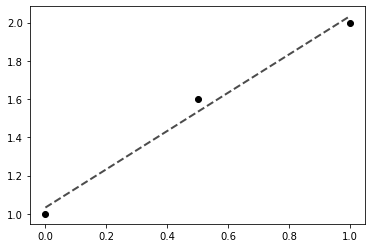

In [2]:
import numpy as np

# Example (adding an additional constraint to the perfectly determined example above)
tobs = np.array([0., 0.5, 1.])
Tobs = np.array([1., 1.6, 2.])

## Using scipy
from scipy import linalg
E = np.array([
    [1., tobs[0]],
    [1., tobs[1]],
    [1., tobs[2]]
])
Et = E.transpose()
W = np.identity(tobs.size)

Wi = linalg.inv(W)
EtWiE = np.matmul(Et, np.matmul(Wi, E))
EtWiE_i = linalg.inv(EtWiE)

Edag = np.matmul(EtWiE_i, np.matmul(Et, Wi))
c_scipy = np.matmul(Edag, Tobs)

# Ouput grid
t = np.arange(0., 1.1, 0.1)
y_scipy = c_scipy[0]+c_scipy[1]*t
y = c[0]+c[1]*t

import matplotlib.pyplot as plt
plt.plot(tobs, Tobs, "ko")
plt.plot(t, y_scipy, "k--", alpha=0.7, lw=2)

print("We expect little solution bias because the estimator nearly satisfies the property that EdagE = I")
print(np.matmul(Edag, E))

**Note:** If the inverse $\mathbf{E}^{\top} \mathbf{W}^{-1} \mathbf{E}$ does not exist, then the problem that appeared overdetermed by the dimensions of $\mathbf{E}$ is not actually overdetermed in practice.

In [3]:
import numpy as np

# Example (singular matrix, where the inverse of EtWiE does not exist.
tobs = np.array([0., 0.])
Tobs = np.array([1., 2.])

## Using scipy
from scipy import linalg
E = np.array([
    [1., tobs[0]],
    [1., tobs[1]],
])
Et = E.transpose()
W = np.identity(tobs.size)

Wi = linalg.inv(W)
EtWiE = np.matmul(Et, np.matmul(Wi, E))
EtWiE_i = linalg.inv(EtWiE)

Edag = np.matmul(EtWiE_i, np.matmul(Et, Wi))
c_scipy = np.matmul(Edag, Tobs)

# Ouput grid
t = np.arange(0., 1.1, 0.1)
y_scipy = c_scipy[0]+c_scipy[1]*t
y = c[0]+c[1]*t

import matplotlib.pyplot as plt
plt.plot(tobs, Tobs, "ko")
plt.plot(t, y_scipy, "k--", alpha=0.7, lw=2)

LinAlgError: singular matrix

### 1.3.5 Statistics of the least-squares solution

##### Expected value

We identify the *least-squares estimator*
\begin{equation}
\mathbf{E}^{\dagger} =\left( \mathbf{E}^{\top} \mathbf{W}^{-1} \mathbf{E} \right)^{-1} \mathbf{E}^{\top} \mathbf{W}^{-1}
\end{equation}
as the estimator that satisfies $\tilde{\mathbf{x}} = \mathbf{E}^{\dagger} \mathbf{y}$.

The *expected value* of the least-squares solution is thus $ \langle \tilde{\mathbf{x}} \rangle = \langle \mathbf{E}^{\dagger} \mathbf{y} \rangle$.

##### Solution covariance

Dispersion about a solution vector $\tilde{\mathbf{x}}$ is described by the *solution covariance*:
\begin{equation}
\mathbf{C}_{\tilde{x}\tilde{x}} = \langle \left( \tilde{\mathbf{x}} - \langle \tilde{\mathbf{x}} \rangle \right)  \left( \tilde{\mathbf{x}} - \langle \tilde{\mathbf{x}} \rangle \right)^{\top} \rangle,
\end{equation}

which is a symmetric matrix defined by the outer product of the perturbations about the solution $\tilde{\mathbf{x}}' \equiv \tilde{\mathbf{x}} - \langle \tilde{\mathbf{x}} \rangle$. More explicitly, the solution covariance is:
\begin{equation}
\mathbf{C}_{\tilde{x}\tilde{x}} = \begin{pmatrix}
& \langle (\tilde{x}'_{1})^{2} \rangle & \langle \tilde{x}'_{1} \tilde{x}'_{2} \rangle & \dots & \langle \tilde{x}'_{1} \tilde{x}'_{N} \rangle \\
& \langle \tilde{x}'_{2} \tilde{x}'_{1} \rangle &  \langle (\tilde{x}'_{2})^{2} \rangle & \dots & & \\
& \vdots & \vdots & \ddots & \\
& \langle \tilde{x}'_{N} \tilde{x}'_{1} \rangle & & & \langle (\tilde{x}'_{N})^{2} \rangle
\end{pmatrix}
\end{equation}

By definition, the square root of the diagnoal entries are the standard deviations of the elements of $\tilde{\mathbf{x}}$.

##### Bias

The solution bias is the difference between the expected value of the solution and the truth: $\mathbf{b} = \langle x \rangle - \mathbf{x}_{true}$.

This simplicity of this equation is deceptive, however, because the truth is usually not know before or after solving the problem (this is where *perfect model experiments*, or *Observing System Simulation Experiments*, can be useful).

Consider the hypothetical observations $\mathbf{y}_{true} = \mathbf{E} \mathbf{x}_{true} $ that would be obtained from the true solution $\mathbf{x}_{true}$, i.e. $\mathbf{n} \equiv \mathbf{0}$ and there is no noise contamination.

The expected value of the true observations is thus simply $\langle \mathbf{y}_{true} \rangle = \mathbf{E} \mathbf{x}_{true}$ 

Assuming the expected value of the observations approaches these hypothetical "true" observations, $\langle y \rangle \rightarrow \mathbf{y}_{true}$, then the expected value of the solution is:
\begin{equation}
\langle \tilde{\mathbf{x}} \rangle = \mathbf{E}^{\dagger} \langle \mathbf{y} \rangle \approx \mathbf{E}^{\dagger} \mathbf{E} \mathbf{x}_{true}
\end{equation}

The bias is then identified as
\begin{equation}
\mathbf{b} \equiv \langle \tilde{\mathbf{x}} \rangle - \mathbf{x}_{true} = \left( \mathbf{E}^{\dagger} \mathbf{E} - \mathbf{I} \right) \mathbf{x}_{true},
\end{equation}
and thus only vanishes if the estimator has the property that $\mathbf{E}^{\dagger} \mathbf{E} = \mathbf{I}$

##### Uncertainty

The *solution uncertainty* is defined as the dispersion of the solution about the truth,
\begin{equation}
\mathbf{P} = \langle \left( \tilde{\mathbf{x}} - \mathbf{x}_{true} \right) \left( \tilde{\mathbf{x}} - \mathbf{x}_{true} \right)^{\top} \rangle.
\end{equation}

It is useful to rewrite this as
\begin{equation}
\mathbf{P} = \langle \left( \tilde{\mathbf{x}}' + \mathbf{b} \right) \left( \tilde{\mathbf{x}}' + \mathbf{b} \right)^{\top} \rangle
\end{equation}

Expanding this outer product, we have:

\begin{equation}
\mathbf{P} = \mathbf{R}_{\tilde{\mathbf{x}}'\tilde{\mathbf{x}}'} +
\mathbf{R}_{\tilde{\mathbf{x}}'\mathbf{b}} +
\mathbf{R}_{\mathbf{b}\tilde{\mathbf{x}}'} +
\mathbf{R}_{\mathbf{b}\mathbf{b}},
\end{equation}

where we define $\mathbf{R}_{\tilde{\mathbf{x}}'\tilde{\mathbf{x}}'} \equiv \langle \tilde{\mathbf{x}}' (\tilde{\mathbf{x}}')^{\top} \rangle$ (and similarly for $\mathbf{b}$ and cross moments). We identify the second moment of $\tilde{\mathbf{x}}'$ as the solution covariance, $\mathbf{R}_{\tilde{\mathbf{x}}'\tilde{\mathbf{x}}'} = \mathbf{C}_{\tilde{\mathbf{x}}\tilde{\mathbf{x}}}$.

A common assumption is that the solution error $\tilde{\mathbf{x}}'$ is uncorrelated with the bias $\mathbf{b}$, eliminating the cross moments. Since $\langle \mathbf{b} \rangle = \mathbf{b}$ by definition, its second moment is equal to the its outer product, $\mathbf{R}_{bb} = \mathbf{b}\mathbf{b}^{\top}$.

Thus, the solution uncertainty has to components:
\begin{equation}
\mathbf{P} = \mathbf{C}_{\tilde{x}\tilde{x}} + \mathbf{b}\mathbf{b}^{\top},
\end{equation}
the *solution covariance* and a squared measure of the bias.

Later on, we will find it useful to manipulate the weight matrix (a subjective choice) to eliminate bias (if the estimator is biased) and minimize the remaining uncertainty due to the solution covariance.

In [13]:
# Example: least squares with uncorrelated and uniform noise

In [14]:
# Example: variance of a series of noisy observations

## 1.4 Underdetermined problems

In [15]:
# Example: under-determined mixed signals and leveraging guesses (page 31)

## 2.6 Correlated observations

## 2.9 Gauss-Markov estimation

As opposed to the previously studied *least-squares* problems where we aimed to minimize the sum of squared errors relative to observations, we hear aim to minimize point-by-point uncertainty relative to the *truth*. Mathematically, we aim to individually minimalize the diagonal elements of the *solution uncertainty*,
\begin{equation}
\mathbf{P} = \langle \left( \tilde{\mathbf{x}} - \mathbf{x}_{true} \right) \left( \tilde{\mathbf{x}} - \mathbf{x}_{true} \right) \rangle^{\top},
\end{equation}
i.e. we search for the solution with the minimum variance about the truth.

Let us suppose the solution can be expressed as a linear combination of the observations, $\tilde{\mathbf{x}} = \mathbf{F} \mathbf{y}$, with a yet-to-be-determined estimator $\mathbf{F}$.

The solution uncertainty $P$ can be expressed in terms of second moments of the true solution $\mathbf{x}_{true}$ and the observations $\mathbf{y}$,

\begin{equation}
\mathbf{P} = \left( \mathbf{F} - \mathbf{R}_{xy} \mathbf{R}_{yy}^{-1} \right) \mathbf{R}_{yy} \left( \mathbf{F} - \mathbf{R}_{xy} \mathbf{R}_{yy}^{-1} \right)^{\top} - \mathbf{R}_{xy}\mathbf{R}_{yy}^{-1}\mathbf{R}_{xy}^{\top} + \mathbf{R}_{xx}
\end{equation}

#### Solution method

The *Gauss-Markov Theorem* states that minimizing the diagonal elements of $\mathbf{P}$ is accomplished by choosing $\mathbf{F}$ so that the terms in parentheses vanish, i.e.

\begin{equation}
\mathbf{F} = \mathbf{R}_{xy}\mathbf{R}_{yy}^{-1}
\end{equation}

With the assumptions that $\langle \mathbf{x} \rangle = \mathbf{0}$ and $\langle \mathbf{y} \rangle = \mathbf{0}$, the estimator is the *Best Linear Unbiased Estimator* (BLUE) for this model. (In practice, the sample-mean is removed from $\mathbf{y}$ since the true mean is unknown).

The estimated solution is thus
\begin{equation}
\tilde{\mathbf{x}} = \mathbf{R}_{xy} \mathbf{R}_{yy}^{-1} \mathbf{y}
\end{equation}

Usually, $\mathbf{R}_{xy}$ is not known. However, it can be derived from other equations. In particular, from the definition of the second moment of the observations $\mathbf{y}$,
\begin{equation}
\mathbf{R}_{yy} = \langle \left( \mathbf{E}\mathbf{x} + \mathbf{n} \right) \left( \mathbf{E} \mathbf{x} + \mathbf{n} \right)^{T} \rangle = \mathbf{E} \mathbf{R}_{xx} \mathbf{E}^{\top} + \mathbf{R}_{nn},
\end{equation}
where we ignore cross-moments $\mathbf{R}_{xn}$.

From here, we can diagnose $\mathbf{R}_{xy} = \langle \mathbf{x} \mathbf{y}^{\top} \rangle = \langle \mathbf{x} \left( \mathbf{E}\mathbf{x} + \mathbf{n} \right)^{\top} \rangle = \mathbf{R}_{xx}\mathbf{E}^{\top} $.

Plugging these expressions into $\tilde{\mathbf{x}} = \mathbf{F}\mathbf{y}$, we find

\begin{equation}
\tilde{\mathbf{x}} = \mathbf{R}_{xx} \mathbf{E}^{\top} \left( \mathbf{E} \mathbf{R}_{xx} \mathbf{E}^{T} + \mathbf{R}_{nn} \right)^{-1} \mathbf{y}
\end{equation}

#### General solution

In the general case, where we relax the zero-mean assumptions and instead have a mean state $\langle \mathbf{x} \rangle = \mathbf{x}_{0}$, the second moments are replaced by covariances and we have

\begin{equation}
\tilde{\mathbf{x}} = \mathbf{x}_{0} + \mathbf{C}_{xx} \mathbf{E}^{T} \left( \mathbf{E} \mathbf{C}_{xx}\mathbf{E}^{\top} + \mathbf{C}_{nn} \right)^{-1} \left( \mathbf{y} - \mathbf{E} \mathbf{x}_{0} \right)
\end{equation}

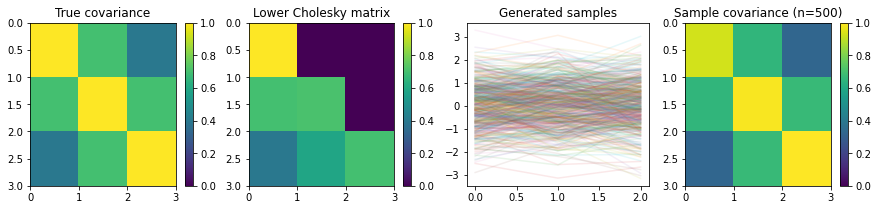

In [17]:
# Example: generating an auto-correlated dataset

n = 500;
Cxx = np.array([
    [1, 0.7, 0.4],
    [0.7, 1, 0.7],
    [0.4, 0.7, 1.]
])
N = Cxx.shape[1]
L = linalg.cholesky(Cxx, lower=True)
X = np.random.normal(0., 1, (N, n))
Z = np.matmul(L, X);

plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
plt.title("True covariance")
plt.pcolor(Cxx, vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()
plt.subplot(1,4,2)
plt.title("Lower Cholesky matrix")
plt.pcolor(L, vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()
plt.subplot(1,4,3)
plt.title("Generated samples")
plt.plot(Z, alpha=0.1);
plt.subplot(1,4,4)
plt.title(f"Sample covariance (n={n})")
plt.pcolor(np.cov(Z), vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()

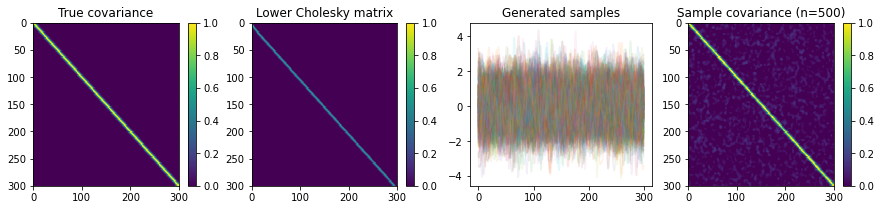

In [18]:
# Example: estimating a noisy timeseries with a gap

N = 300

t = np.arange(0, N)

# autocorrelation function rho(delta = 1 - 0.005δ)
def ρ(δ, σ=4.):
    #return np.exp(-np.abs(δ)/10)
    return np.exp(-(δ/σ)**2)
    #return np.maximum(1. - 0.005*np.abs(δ), 0)

Cxx = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        Cxx[i,j] = ρ(i-j)
#Cxx[Cxx<1e-5] = 1.e-5
#Cxx += np.random.normal(0., 1e-16, Cxx.shape)
L = linalg.cholesky(Cxx, lower=True)

n = 500
X = np.random.normal(0., 1, (N, n))
Z = np.matmul(L, X);

plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
plt.title("True covariance")
plt.pcolor(Cxx, vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()
plt.subplot(1,4,2)
plt.title("Lower Cholesky matrix")
plt.pcolor(L, vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()
plt.subplot(1,4,3)
plt.title("Generated samples")
plt.plot(Z, alpha=0.1);
plt.subplot(1,4,4)
plt.title(f"Sample covariance (n={n})")
plt.pcolor(np.cov(Z), vmin=0, vmax=1)
plt.ylim(N,0)
plt.colorbar()

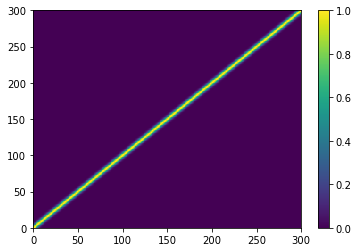

In [19]:
plt.pcolor(Cxx)
plt.colorbar()

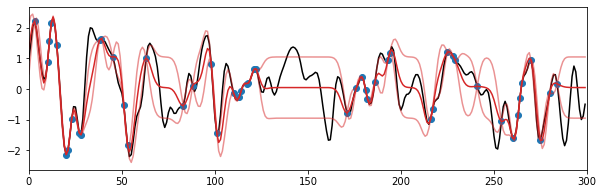

In [20]:
i=np.random.randint(0, n)
xtrue = Z[:,i]

# sub-sample with a gap in the data
idx = np.arange(0,xtrue.size)
idx = np.append(idx[:40], idx[60:])
M = idx.size

#M = np.random.randint(0, N//2)
#M = N//2
M = 50
idx = np.arange(0, N)
np.random.shuffle(idx)
idx = np.sort(idx[:M])

tobs = t[idx]
yobs = xtrue[idx]
y0 = np.mean(yobs)
yobs -= y0

E = np.zeros((M,N))
for i in range(M):
    for j in range(N):
        if (tobs[i]==t[j]) & (j in idx):
            E[i,j] = 1

CxxEt = np.matmul(Cxx, E.transpose())
ECxxEt_i = linalg.inv(np.matmul(E, CxxEt))
F = np.matmul(CxxEt, ECxxEt_i)

x = np.matmul(F, yobs)
P = Cxx - np.matmul(F, np.matmul(E, Cxx))
P[P<0] = 0.
σ = np.sqrt(np.diag(P))

plt.figure(figsize=(10,3))
plt.plot(t, xtrue, "k-")
plt.plot(tobs, yobs+y0, "C0o")
plt.plot(t, x+y0, "C3-")
plt.plot(t, x+y0-σ, "C3-", alpha=0.5)
plt.plot(t, x+y0+σ, "C3-", alpha=0.5)
plt.xlim([0, N])
plt.savefig("example_GP.png", bbox_inches="tight", dpi=150.)

In [21]:
δtbins = np.array([-5, 0., 2.5, 5., 10., 40., 100., N])
σsample = np.std(yobs)
Rρ = np.zeros(δtbins.size-1)
NRρ = np.zeros(δtbins.size-1)
for i in range(M):
    for j in range(M):
        δt = np.abs(tobs[i]-tobs[j])
        ρtmp = (yobs[i]*yobs[j])/(σsample**2)
        ibin = np.argmin(np.abs(δtbins - δt))
        if δtbins[ibin] >= δt:
            ibin -= 1
        Rρ[ibin] += ρtmp
        NRρ[ibin] += 1
Rρ = Rρ/NRρ

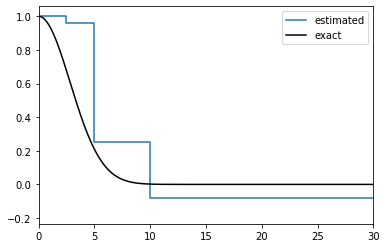

In [22]:
plt.step(δtbins[1:], Rρ, where="post", label="estimated")
t_hi = np.arange(0., 30, 0.05)
plt.plot(t_hi, ρ(t_hi), "k-", label="exact")
plt.xlim(0, 30)
plt.legend()
plt.savefig("autocovariance.png", bbox_inches="tight", dpi=150.)